# IRF
Compare three kinds of instrument response function (cauchy, gaussian, pseudo voigt or voigt).

For pseudo voigt profile ${fwhm}({fwhm}_G, {fwhm}_L)$ and $\eta({fwhm}_G, {fwhm}_L)$ is chosen according to
 [J. Appl. Cryst. (2000). **33**, 1311-1316](https://doi.org/10.1107/S0021889800010219)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import TRXASprefitpack
from TRXASprefitpack import gau_irf, cauchy_irf, pvoigt_irf
from TRXASprefitpack import calc_eta, calc_fwhm
from TRXASprefitpack import voigt
plt.rcParams["figure.figsize"] = (12,9)

## version infromation

In [2]:
print(TRXASprefitpack.__version__)

0.6.0


## Compare cauchy and gaussian IRF with same fwhm

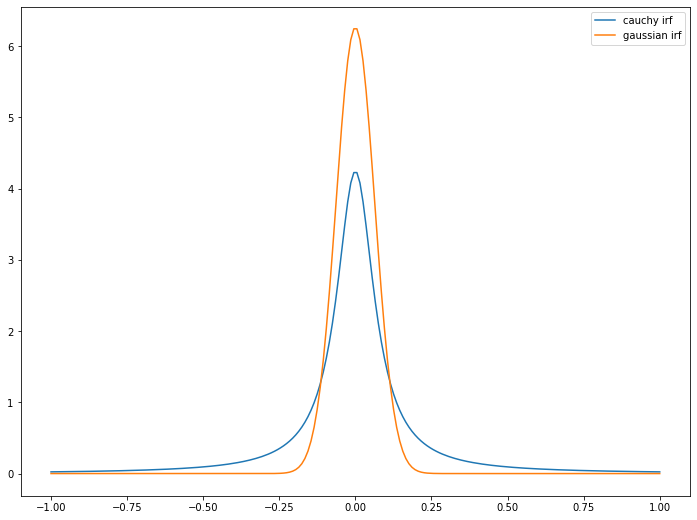

In [8]:
fwhm = 0.15 # 150 fs
t = np.linspace(-1,1,200)
cauchy = cauchy_irf(t,fwhm)
gau = gau_irf(t,fwhm)
plt.plot(t, cauchy, label='cauchy irf')
plt.plot(t, gau, label='gaussian irf')
plt.legend()
plt.show()

Cauchy irf is more diffuse then Gaussian irf

## Compare pseudo voigt irf and voigt irf with different combination of (fwhm_G, fwhm_L)

1. (0.1, 0.3)
2. (0.1, 0.15)
3. (0.1, 0.1)
4. (0.15, 0.1)
5. (0.3, 0.1)

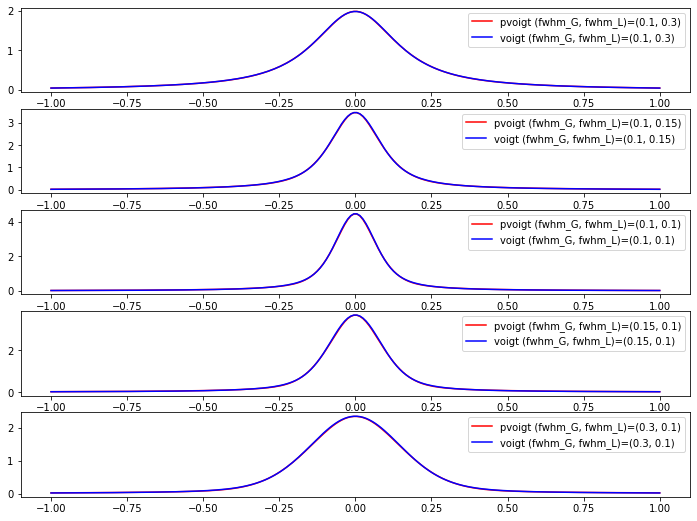

In [7]:
fwhm_G_1, fwhm_L_1 = (0.1, 0.3)
fwhm_G_2, fwhm_L_2 = (0.1, 0.15)
fwhm_G_3, fwhm_L_3 = (0.1, 0.1)
fwhm_G_4, fwhm_L_4 = (0.15, 0.1)
fwhm_G_5, fwhm_L_5 = (0.3, 0.1)


fwhm_1, eta_1 = (calc_fwhm(fwhm_G_1, fwhm_L_1), calc_eta(fwhm_G_1, fwhm_L_1))
fwhm_2, eta_2 = (calc_fwhm(fwhm_G_2, fwhm_L_2), calc_eta(fwhm_G_2, fwhm_L_2))
fwhm_3, eta_3 = (calc_fwhm(fwhm_G_3, fwhm_L_3), calc_eta(fwhm_G_3, fwhm_L_3))
fwhm_4, eta_4 = (calc_fwhm(fwhm_G_4, fwhm_L_4), calc_eta(fwhm_G_4, fwhm_L_4))
fwhm_5, eta_5 = (calc_fwhm(fwhm_G_5, fwhm_L_5), calc_eta(fwhm_G_5, fwhm_L_5))

pvoigt1 = pvoigt_irf(t, fwhm_1, eta_1)
pvoigt2 = pvoigt_irf(t, fwhm_2, eta_2)
pvoigt3 = pvoigt_irf(t, fwhm_3, eta_3)
pvoigt4 = pvoigt_irf(t, fwhm_4, eta_4)
pvoigt5 = pvoigt_irf(t, fwhm_5, eta_5)

voigt1 = voigt(t, fwhm_G_1, fwhm_L_1)
voigt2 = voigt(t, fwhm_G_2, fwhm_L_2)
voigt3 = voigt(t, fwhm_G_3, fwhm_L_3)
voigt4 = voigt(t, fwhm_G_4, fwhm_L_4)
voigt5 = voigt(t, fwhm_G_5, fwhm_L_5)

plt.subplot(511)
plt.plot(t, pvoigt1, label=f'pvoigt (fwhm_G, fwhm_L)=({fwhm_G_1}, {fwhm_L_1})', color='red')
plt.plot(t, voigt1, label=f'voigt (fwhm_G, fwhm_L)=({fwhm_G_1}, {fwhm_L_1})', color='blue')
plt.legend()

plt.subplot(512)
plt.plot(t, pvoigt2, label=f'pvoigt (fwhm_G, fwhm_L)=({fwhm_G_2}, {fwhm_L_2})', color='red')
plt.plot(t, voigt2, label=f'voigt (fwhm_G, fwhm_L)=({fwhm_G_2}, {fwhm_L_2})', color='blue')
plt.legend()

plt.subplot(513)
plt.plot(t, pvoigt3, label=f'pvoigt (fwhm_G, fwhm_L)=({fwhm_G_3}, {fwhm_L_3})', color='red')
plt.plot(t, voigt3, label=f'voigt (fwhm_G, fwhm_L)=({fwhm_G_3}, {fwhm_L_3})', color='blue')
plt.legend()

plt.subplot(514)
plt.plot(t, pvoigt4, label=f'pvoigt (fwhm_G, fwhm_L)=({fwhm_G_4}, {fwhm_L_4})', color='red')
plt.plot(t, voigt4, label=f'voigt (fwhm_G, fwhm_L)=({fwhm_G_4}, {fwhm_L_4})', color='blue')
plt.legend()

plt.subplot(515)
plt.plot(t, pvoigt5, label=f'pvoigt (fwhm_G, fwhm_L)=({fwhm_G_5}, {fwhm_L_5})', color='red')
plt.plot(t, voigt5, label=f'voigt (fwhm_G, fwhm_L)=({fwhm_G_5}, {fwhm_L_5})', color='blue')
plt.legend()
plt.show()

As you can see the selection of ${fwhm}$ and $\eta$ based on  [J. Appl. Cryst. (2000). **33**, 1311-1316](https://doi.org/10.1107/S0021889800010219) well approximates real voigt profile